In [5]:
# Steps for Data Transformation

# 1.
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 2.
df = pd.read_csv("/root/data/Exercise-CarData.csv", na_values = ["????","??"])
print("\nData: \n", df)
print(df.dtypes)

for col_name,col_val in df.items():
  print("nan values in column (",col_name,") are : ", df[col_name].isna().sum())

# 3.
x = df.iloc[:, ~df.columns.isin(['Price'])].values
print("Features (x) : \n",x)
print()

y = df.iloc[:,1].values
print("Size of y : ", y.size)
print("Label (y) :",y)

x_new = df.iloc[:, ~df.columns.isin(['FuelType','Doors','Price'])].values
print("\nx_new : \n",x_new)


# 4.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
print("\n\nScaled X : \n", X_scaled)

# 5.
std = StandardScaler()
X_std = std.fit_transform(x_new)
print("\n\nStandardized X : \n", X_std)


Data: 
       Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
0              0  13500  23.0  46986.0   Diesel   90.0       1.0          0   
1              1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
2              2  13950  24.0  41711.0   Diesel   90.0       NaN          0   
3              3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4              4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
...          ...    ...   ...      ...      ...    ...       ...        ...   
1431        1431   7500   NaN  20544.0   Petrol   86.0       1.0          0   
1432        1432  10845  72.0      NaN   Petrol   86.0       0.0          0   
1433        1433   8500   NaN  17016.0   Petrol   86.0       0.0          0   
1434        1434   7250  70.0      NaN      NaN   86.0       1.0          0   
1435        1435   6950  76.0      1.0   Petrol  110.0       0.0          0   

        CC  Doors  Weight  
0     2000  th

In [6]:
# Handling Catagorical Data

# 1.
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# 2.
le = LabelEncoder()
x[ : ,3] = le.fit_transform(x[ : ,3])
print("\n\nInput : \n", x[:,3])

dummy = pd.get_dummies(df['FuelType'])
print("\n\nDummy :\n",dummy)
df = df.drop(['FuelType'],axis=1)
# df = pd.concat([dummy,dataset],axis=1)
df.insert(loc = 4,
               column = 'CNG',
               value = dummy.iloc[:,0])
df.insert(loc = 5,
               column = 'Diesel',
               value = dummy.iloc[:,1])
df.insert(loc = 6,
               column = 'Petrol',
               value = dummy.iloc[:,2])
print("\n\nFinal Data :\n",df)



Input : 
 [1 1 1 ... 2 3 2]


Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
2              2  13950  24.0  41711.0    0       1       0   90.0       NaN   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1431        1431   7500   NaN  20544.0    0   

In [7]:
# Handling Missing values

# 1.
from sklearn.impute import SimpleImputer

# 2.
data1 = pd.DataFrame(df)
data1.dropna(axis=0,how='any',inplace=True)
print("\nNew Data :",data1)
data1.info()

# 3.
print(df)
data2 = pd.DataFrame(df)
print(data2)

for col_name,col_val in data2.items():
  if(col_name != "Price" and col_name != "CNG" and col_name != "Diesel" and col_name != "Petrol" and col_name != "Doors"):
    if(data2[col_name].isna().sum() != 0):
      data2[col_name] = data2[col_name].fillna(data2[col_name].mean())

data2

data3 = pd.DataFrame(df)
print(data3)

imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
for i in range(0,len(data3.axes[1])):
  if(data3.iloc[:,i].isna().sum() > 0 and (data3.iloc[:,:i].dtype == "int64" or data3.iloc[:,:i].dtype == "float64")):
    imputer = imputer.fit(data3[:, i:i+1])
    data3.iloc[:,:i] = imputer.transform(data3.iloc[:,i:i+1])
data3


New Data :       Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
5              5  12950  32.0  61000.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1423        1423   7950  80.0  35821.0    0       0       1   86.0       0.0   
1424        1424   7750  73.0  34717.0    0       0       1   86.0       0.0   
1429        1429   8950  78.0  24000.0    0       0       1   86.0       1.0   
1430        1430   8450  80.0  23000.0    0       0       1   86.0       0.0   
1435        1435   6950  76.0      1.0    0       0       1  110.0       0.0   

      Automatic    CC  Door

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   CNG         1436 non-null   uint8  
 5   Diesel      1436 non-null   uint8  
 6   Petrol      1436 non-null   uint8  
 7   HP          1430 non-null   float64
 8   MetColor    1286 non-null   float64
 9   Automatic   1436 non-null   int64  
 10  CC          1436 non-null   int64  
 11  Doors       1436 non-null   object 
 12  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(1), uint8(3)
memory usage: 116.5+ KB
      Unnamed: 0       KM  CNG  Diesel  Petrol     HP  MetColor  Automatic  \
0              0  46986.0    0       1       0   90.0       1.0          0   
1              1  72937.0    0       1       0  

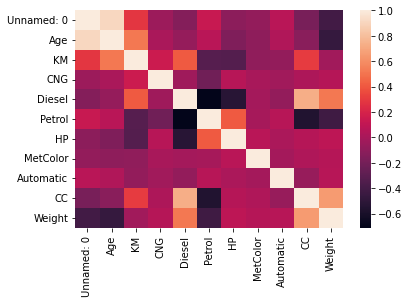

In [8]:
# Correlation

# 1.
import seaborn as sns

# 2.
dataset2 = pd.DataFrame(df)
dataset2.drop(dataset2.columns[[1,11]],axis=1,inplace=True)
dataset2
df.info()

corr = dataset2.corr()
corr.head(15)

sns.heatmap(corr)

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

selected_columns = dataset2.columns[columns]
selected_columns.shape

data = dataset2[selected_columns]
print(data)